# Statistical analysis of modified data from [1]
[1] Severson, K.A.; Attia, P.M.; Jin, N.; Perkins, N.; Jiang, B.; Yang, Z.; Chen, M.H.; Aykol, M.; Herring, P.K.; Fraggedakis, D.; et al. Data-Driven Prediction of Battery Cycle Life before Capacity Degradation. Nat Energy 2019, 4, 383–391, doi:10.1038/s41560-019-0356-8. [Data-driven prediction of battery cycle life before capacity degradation](https://github.com/rdbraatz/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation.git)

In [ ]:
import sys
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [ ]:
drive.mount("/content/drive", force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab_Notebooks')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/toyota_data')
data_path = '/content/drive/MyDrive/Colab_Notebooks/toyota_data/data/'
model_path = '/content/drive/MyDrive/Colab_Notebooks/toyota_data/model/'
#data_path = './data/'

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
from tqdm import tqdm
import importlib
import tensorflow as tf
import lib_analysis as ca

In [ ]:
importlib.reload(ca)

<module 'lib_analysis' from '/content/drive/MyDrive/Colab_Notebooks/toyota_data/lib_analysis.py'>

In [ ]:
new_cycle_sum = np.load(data_path + 'new_cycle_sum.npy')

eol shape: (124, 100)
cycle_count shape: (124, 100)
cycle_data_dis shape: (114, 100, 4, 500)
cycle_data_ch shape: (114, 100, 4, 500)
cycle_data shape: (114, 100, 4, 1000)


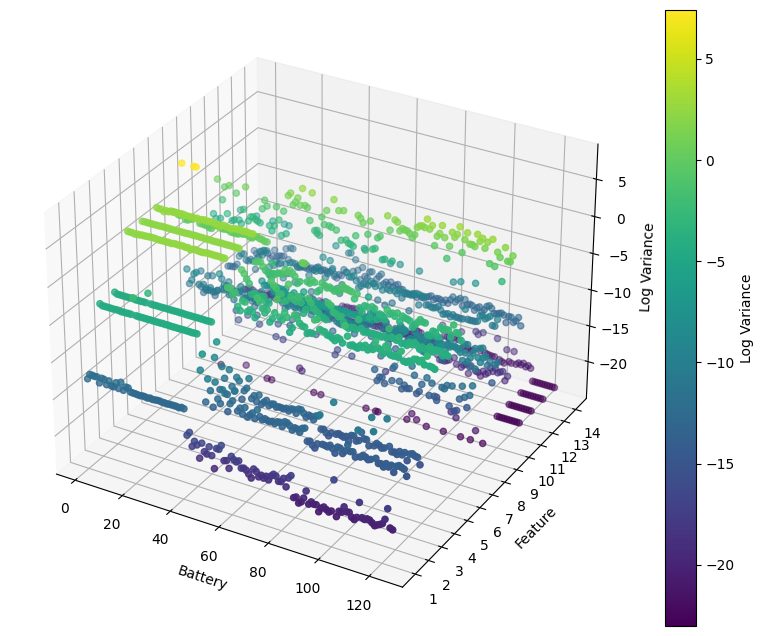

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
#data = np.load('/mnt/data/new_cycle_sum.npy')

# Calculate variance for each feature in each battery over 100 cycles
variance = np.var(new_cycle_sum, axis=2)

# Define a small epsilon value
epsilon = 1e-10

# Calculate the log of the variance + epsilon to avoid undefined values
log_variance_epsilon = np.log(variance + epsilon)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the features
features = ["IR", "QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime", "dqdvavg", "dqdvmax", "dqdvmin", "IDavg", "IDmax", "ICavg", "ICmax"]

# Create a grid of coordinates for the batteries and features
batteries = np.arange(1, log_variance_epsilon.shape[0] + 1)
features_idx = np.arange(1, log_variance_epsilon.shape[1] + 1)

batteries_grid, features_grid = np.meshgrid(batteries, features_idx)

# Plot the variance
sc = ax.scatter(batteries_grid, features_grid, log_variance_epsilon.T, c=log_variance_epsilon.T.flatten(), cmap='viridis')

# Label the axes
ax.set_xlabel('Battery')
ax.set_ylabel('Feature')
ax.set_zlabel('Log Variance')
ax.set_yticks(features_idx)
#ax.set_yticklabels(features)

# Add a colorbar
fig.colorbar(sc, label='Log Variance')

# Show the plot
plt.show()


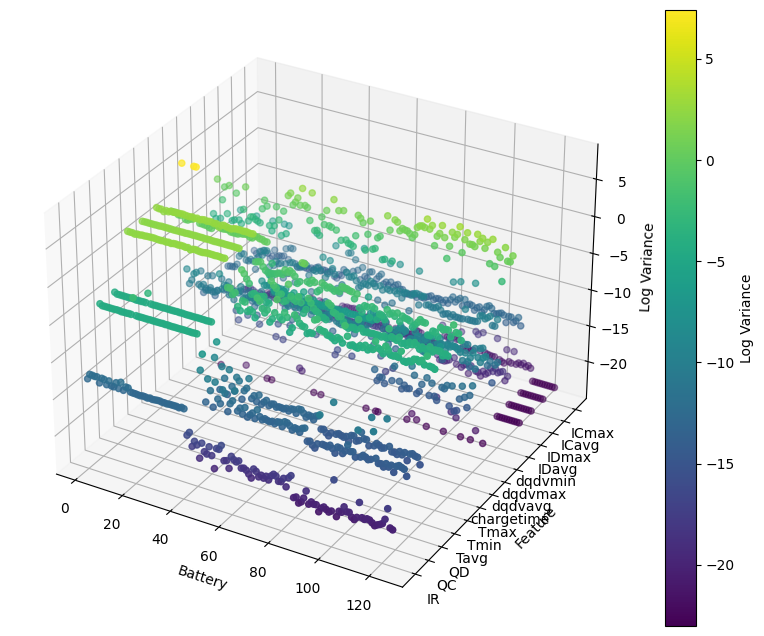

In [ ]:
# Define a small epsilon value
epsilon = 1e-10

# Calculate the log of the variance + epsilon to avoid undefined values
log_variance_epsilon = np.log(variance + epsilon)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the log variance
sc = ax.scatter(batteries_grid, features_grid, log_variance_epsilon.T, c=log_variance_epsilon.T.flatten(), cmap='viridis')

# Label the axes
ax.set_xlabel('Battery')
ax.set_ylabel('Feature')
ax.set_zlabel('Log Variance')
ax.set_yticks(features_idx)
ax.set_yticklabels(features)

# Add a colorbar
fig.colorbar(sc, label='Log Variance')

# Show the plot
plt.show()


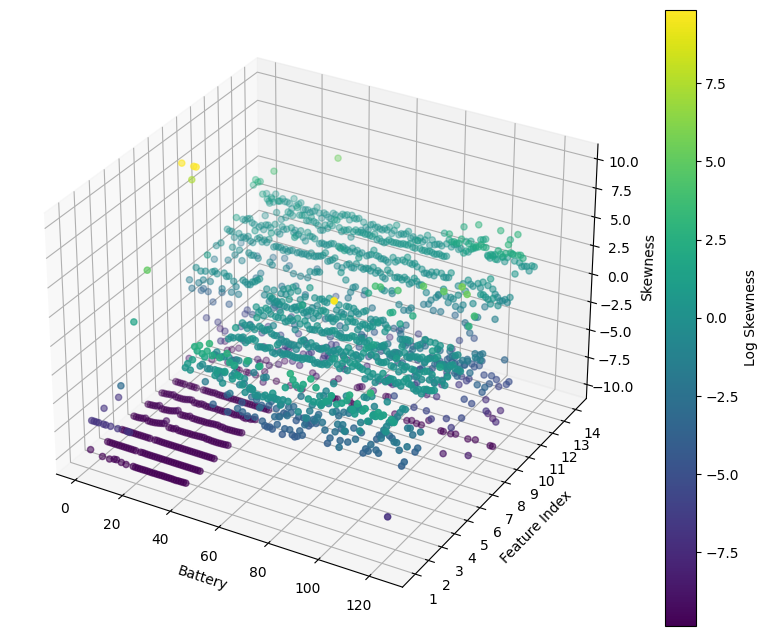

In [ ]:
from scipy.stats import skew

# Calculate skewness for each feature in each battery over 100 cycles
skewness = skew(new_cycle_sum, axis=2)
#shifted_skewness = skewness + np.abs(np.min(skewness)) + epsilon
# Calculate the log of the skewness + epsilon to avoid undefined values
#log_skewness_epsilon = np.log(np.abs(skewness) + epsilon)
log_skewness_epsilon = skewness
#log_skewness_epsilon = np.log(shifted_skewness)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the log skewness
sc = ax.scatter(batteries_grid, features_grid, log_skewness_epsilon.T, c=log_skewness_epsilon.T.flatten(), cmap='viridis')

# Label the axes
ax.set_xlabel('Battery')
ax.set_ylabel('Feature Index')
ax.set_zlabel('Skewness')
ax.set_yticks(features_idx)

# Add a colorbar
fig.colorbar(sc, label='Log Skewness')

# Show the plot
plt.show()


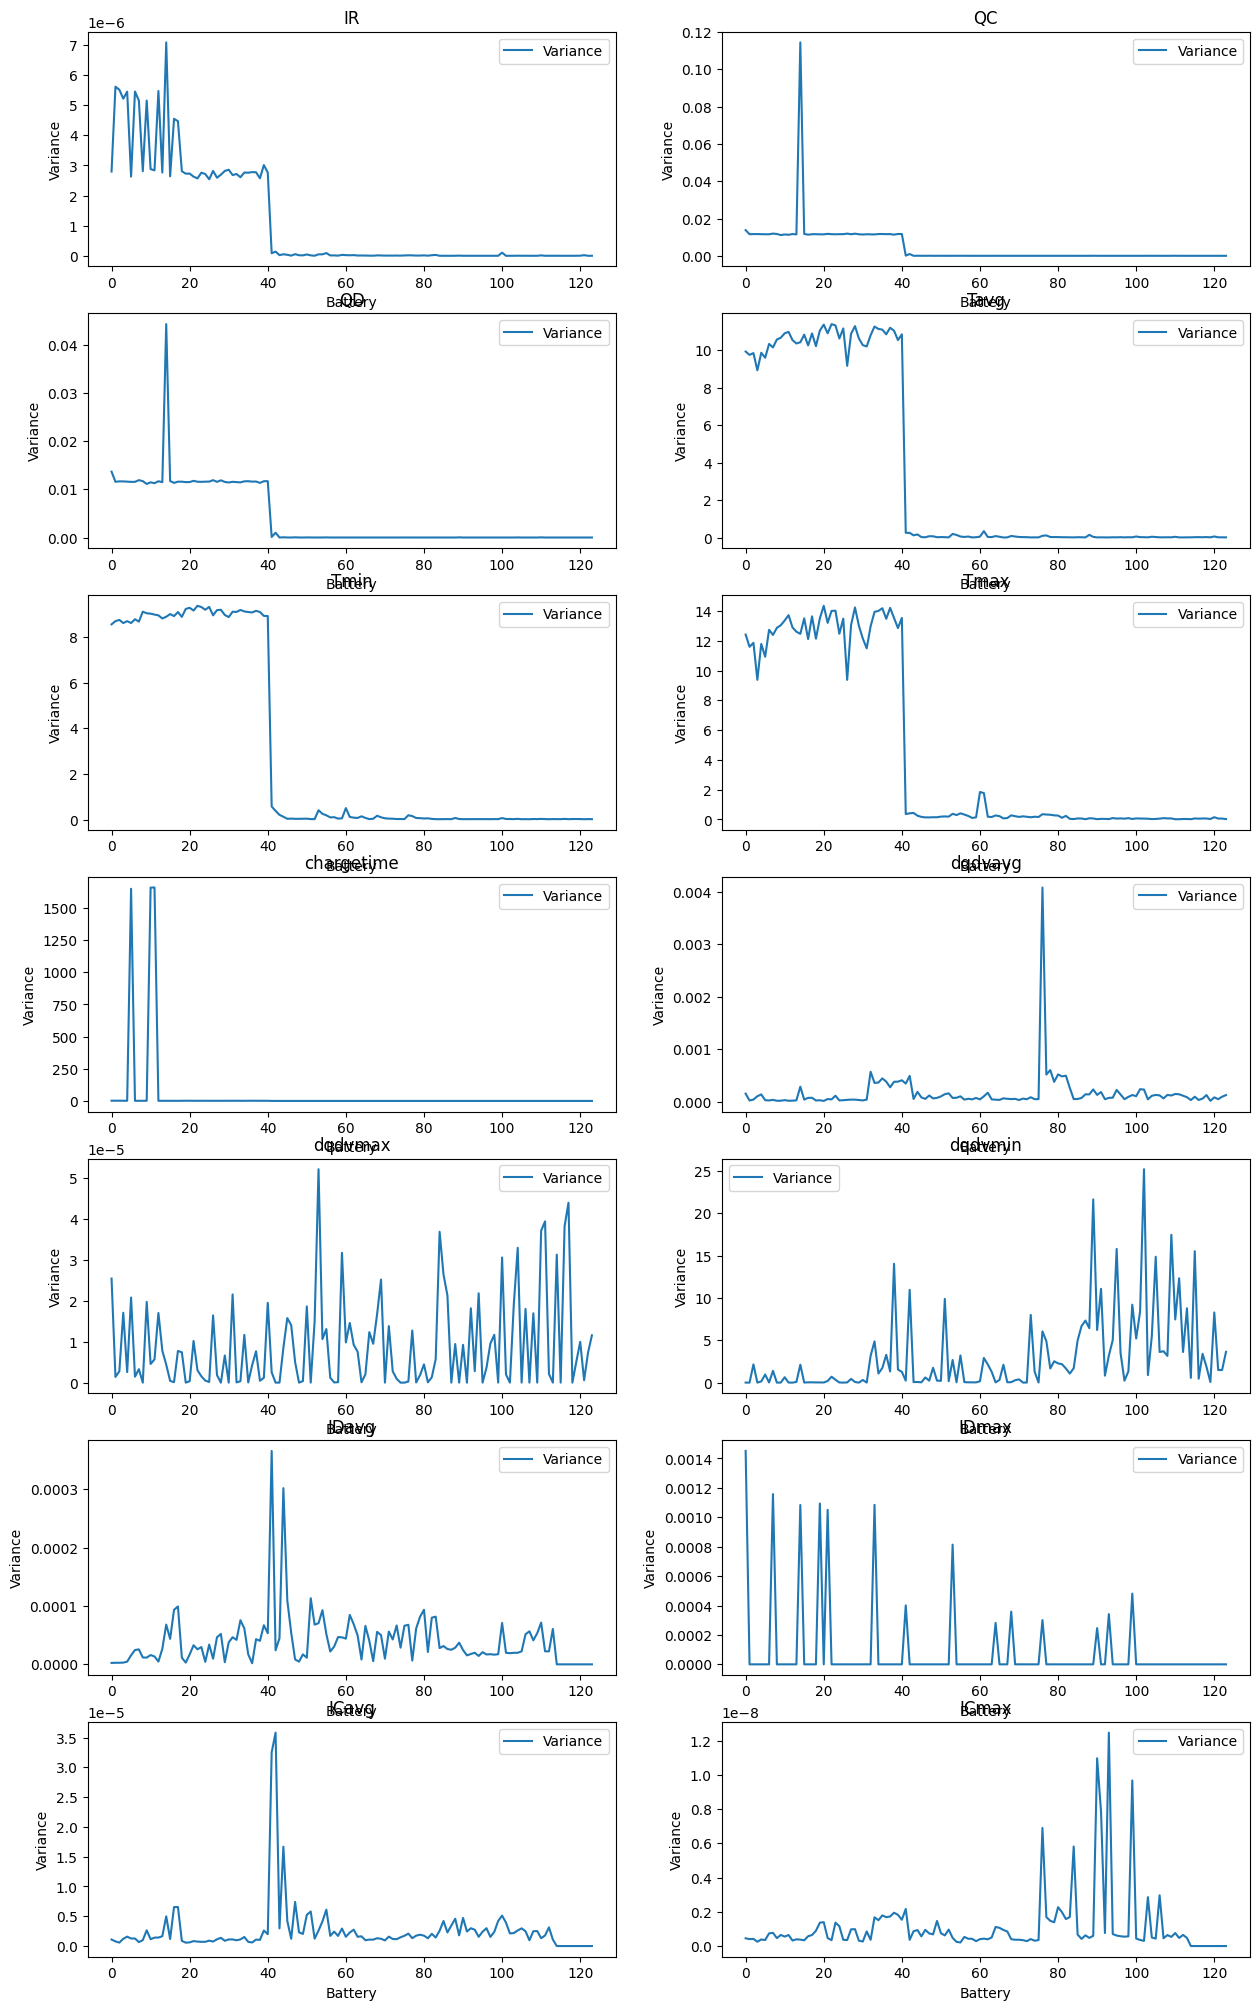

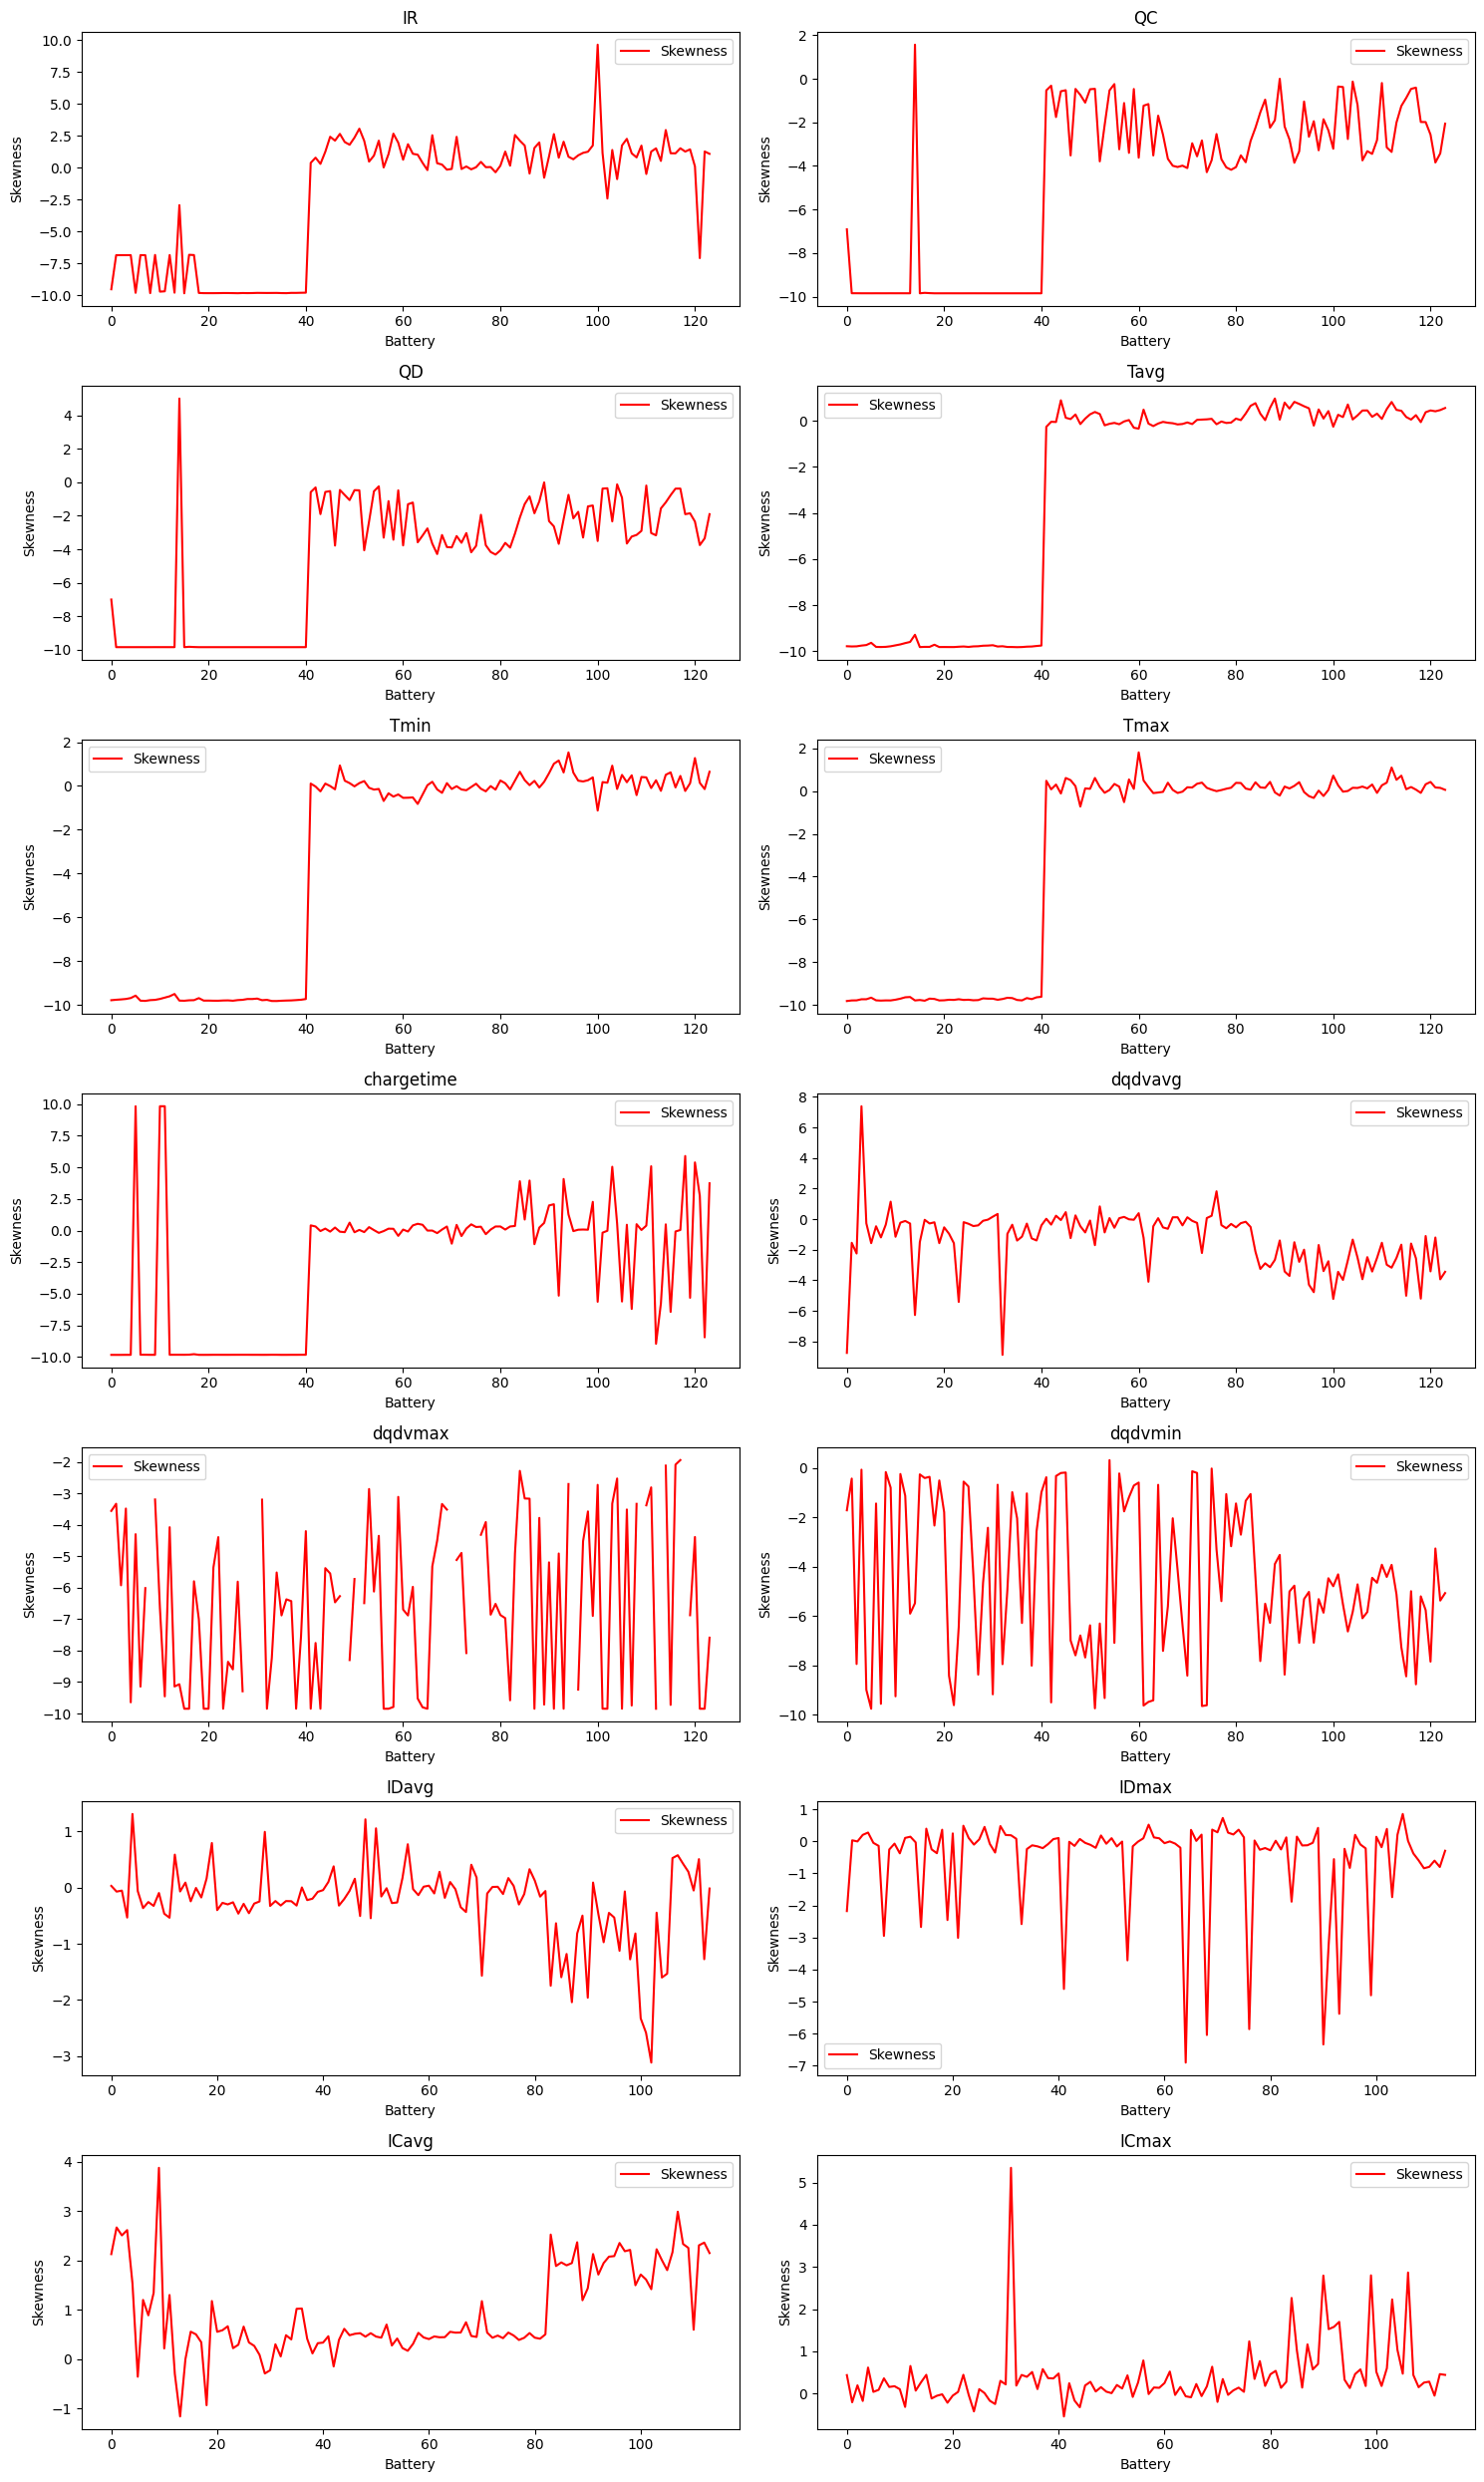

In [ ]:
fig, axs = plt.subplots(7, 2, figsize=(15, 25))

# Flatten the axis array to easily iterate over it
axs = axs.flatten()

# Iterate over each feature and create 2D plot for variance and skewness
for i, feature in enumerate(features):
    # Plot variance
    axs[i].plot(variance[:, i], label='Variance')
    axs[i].set_title(feature)
    axs[i].set_xlabel('Battery')
    axs[i].set_ylabel('Variance')
    axs[i].legend()

# Prepare subplots for skewness
fig, axs = plt.subplots(7, 2, figsize=(15, 25))

# Flatten the axis array to easily iterate over it
axs = axs.flatten()

# Iterate over each feature and create 2D plot for skewness
for i, feature in enumerate(features):
    # Plot skewness
    axs[i].plot(skewness[:, i], label='Skewness', color='r')
    axs[i].set_title(feature)
    axs[i].set_xlabel('Battery')
    axs[i].set_ylabel('Skewness')
    axs[i].legend()

plt.tight_layout()
plt.show()


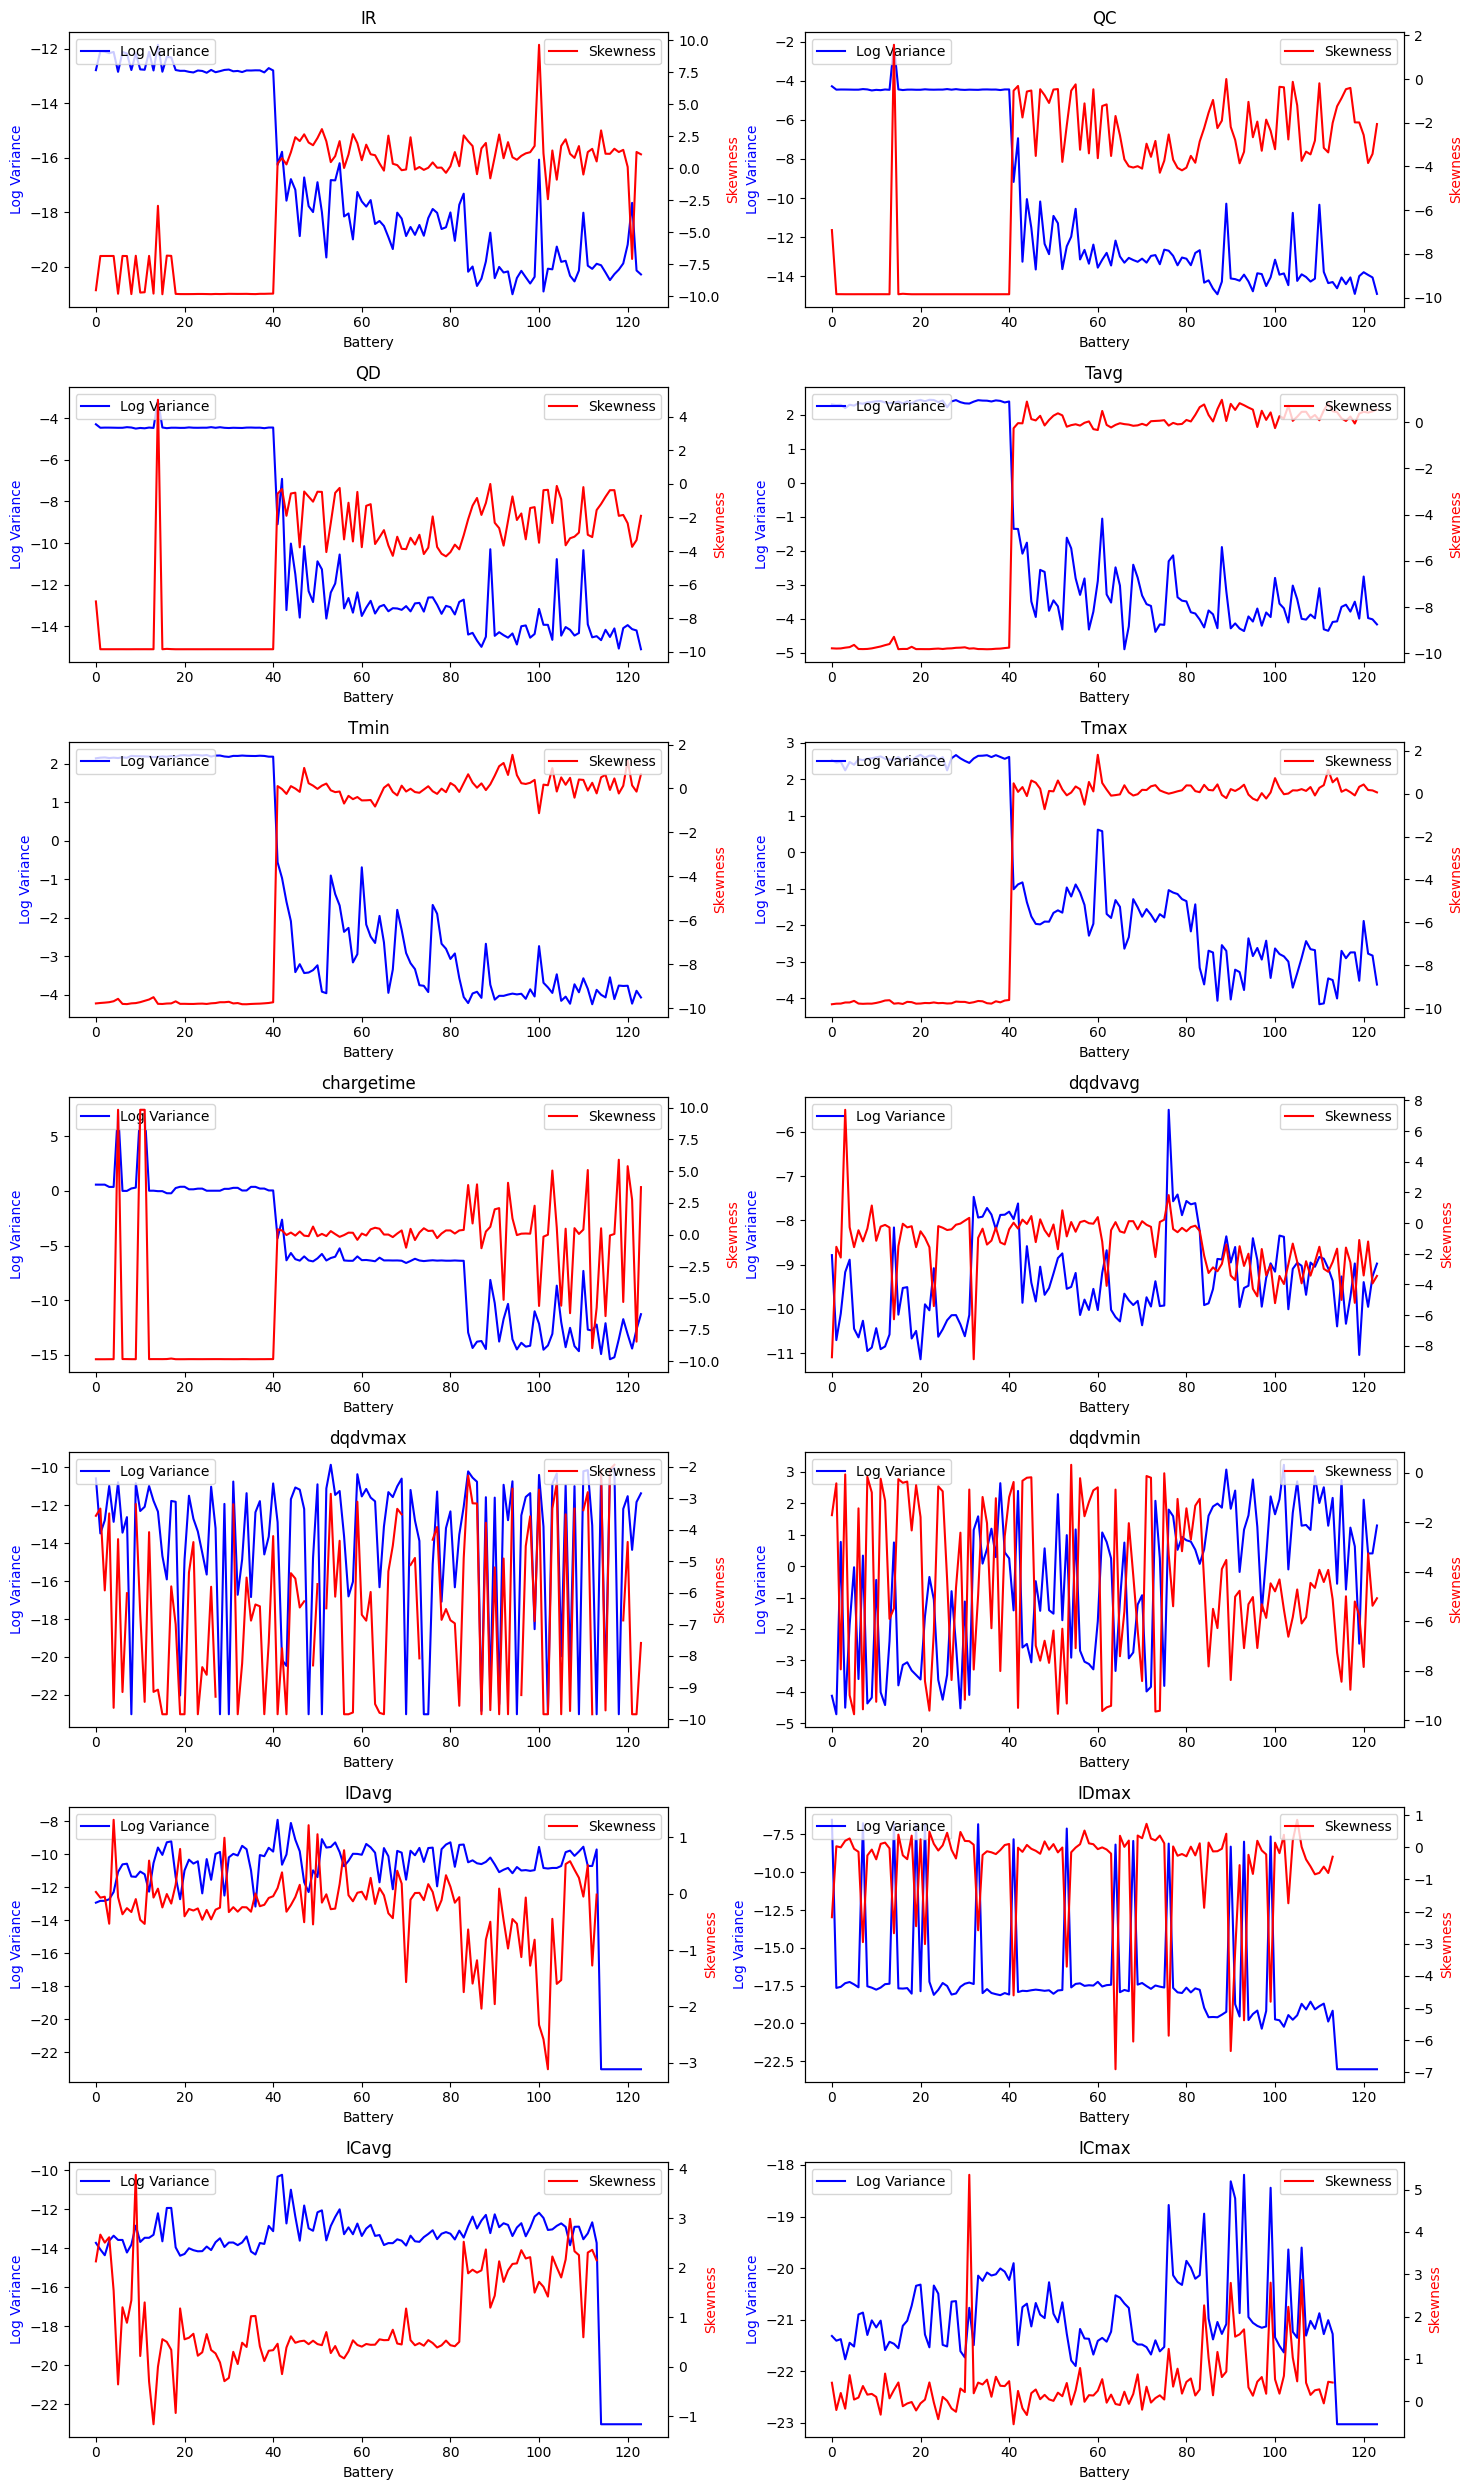

In [ ]:
fig, axs = plt.subplots(7, 2, figsize=(15, 25))

# Flatten the axis array to easily iterate over it
axs = axs.flatten()

# Iterate over each feature and create 2D plot for variance (in log scale) and skewness
for i, feature in enumerate(features):
    # Create twin axes for the second y axis
    ax2 = axs[i].twinx()

    # Plot variance on the first y axis
    axs[i].plot(np.log(variance[:, i] + epsilon), label='Log Variance', color='b')
    axs[i].set_title(feature)
    axs[i].set_xlabel('Battery')
    axs[i].set_ylabel('Log Variance', color='b')
    axs[i].legend(loc='upper left')

    # Plot skewness on the second y axis
    ax2.plot(skewness[:, i], label='Skewness', color='r')
    ax2.set_ylabel('Skewness', color='r')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
eol.shape

(114, 1)

In [ ]:
import numpy as np
from scipy.stats import pearsonr
correlations = []

# Iterate over each feature
for i in range(new_cycle_sum.shape[1]):

    # Initialize list to store correlation values for each cycle
    correlations_feature = []

    # Iterate over each cycle
    for j in range(new_cycle_sum.shape[2]):

        # Create array of feature values for all batteries at current cycle
        feature_values = new_cycle_sum[:, i, j]

        # Calculate correlation with EOL values
        correlation = pearsonr(feature_values, eol.flatten())[0]

        # Append correlation value to list for current feature
        correlations_feature.append(correlation)

    # Append list of correlation values for current feature to main list
    correlations.append(correlations_feature)

# Convert list to NumPy array
correlations = np.array(correlations)

# Take absolute value of correlations
correlations_abs = np.abs(correlations)

correlations_abs.shape


(14, 100)

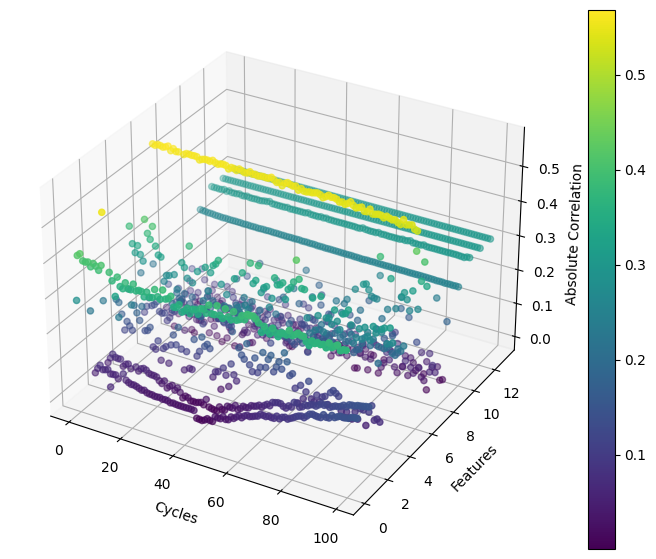

In [ ]:
# Redefine x and y for meshgrid
x = np.arange(correlations_abs.shape[1])  # Cycles
y = np.arange(correlations_abs.shape[0])  # Features
x, y = np.meshgrid(x, y)

# Create 3D scatter plot with absolute correlation values
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(x, y, correlations_abs, c=correlations_abs.flatten(), cmap='viridis')

ax.set_xlabel('Cycles')
ax.set_ylabel('Features')
ax.set_zlabel('Absolute Correlation')

fig.colorbar(scat, ax=ax)


plt.show()


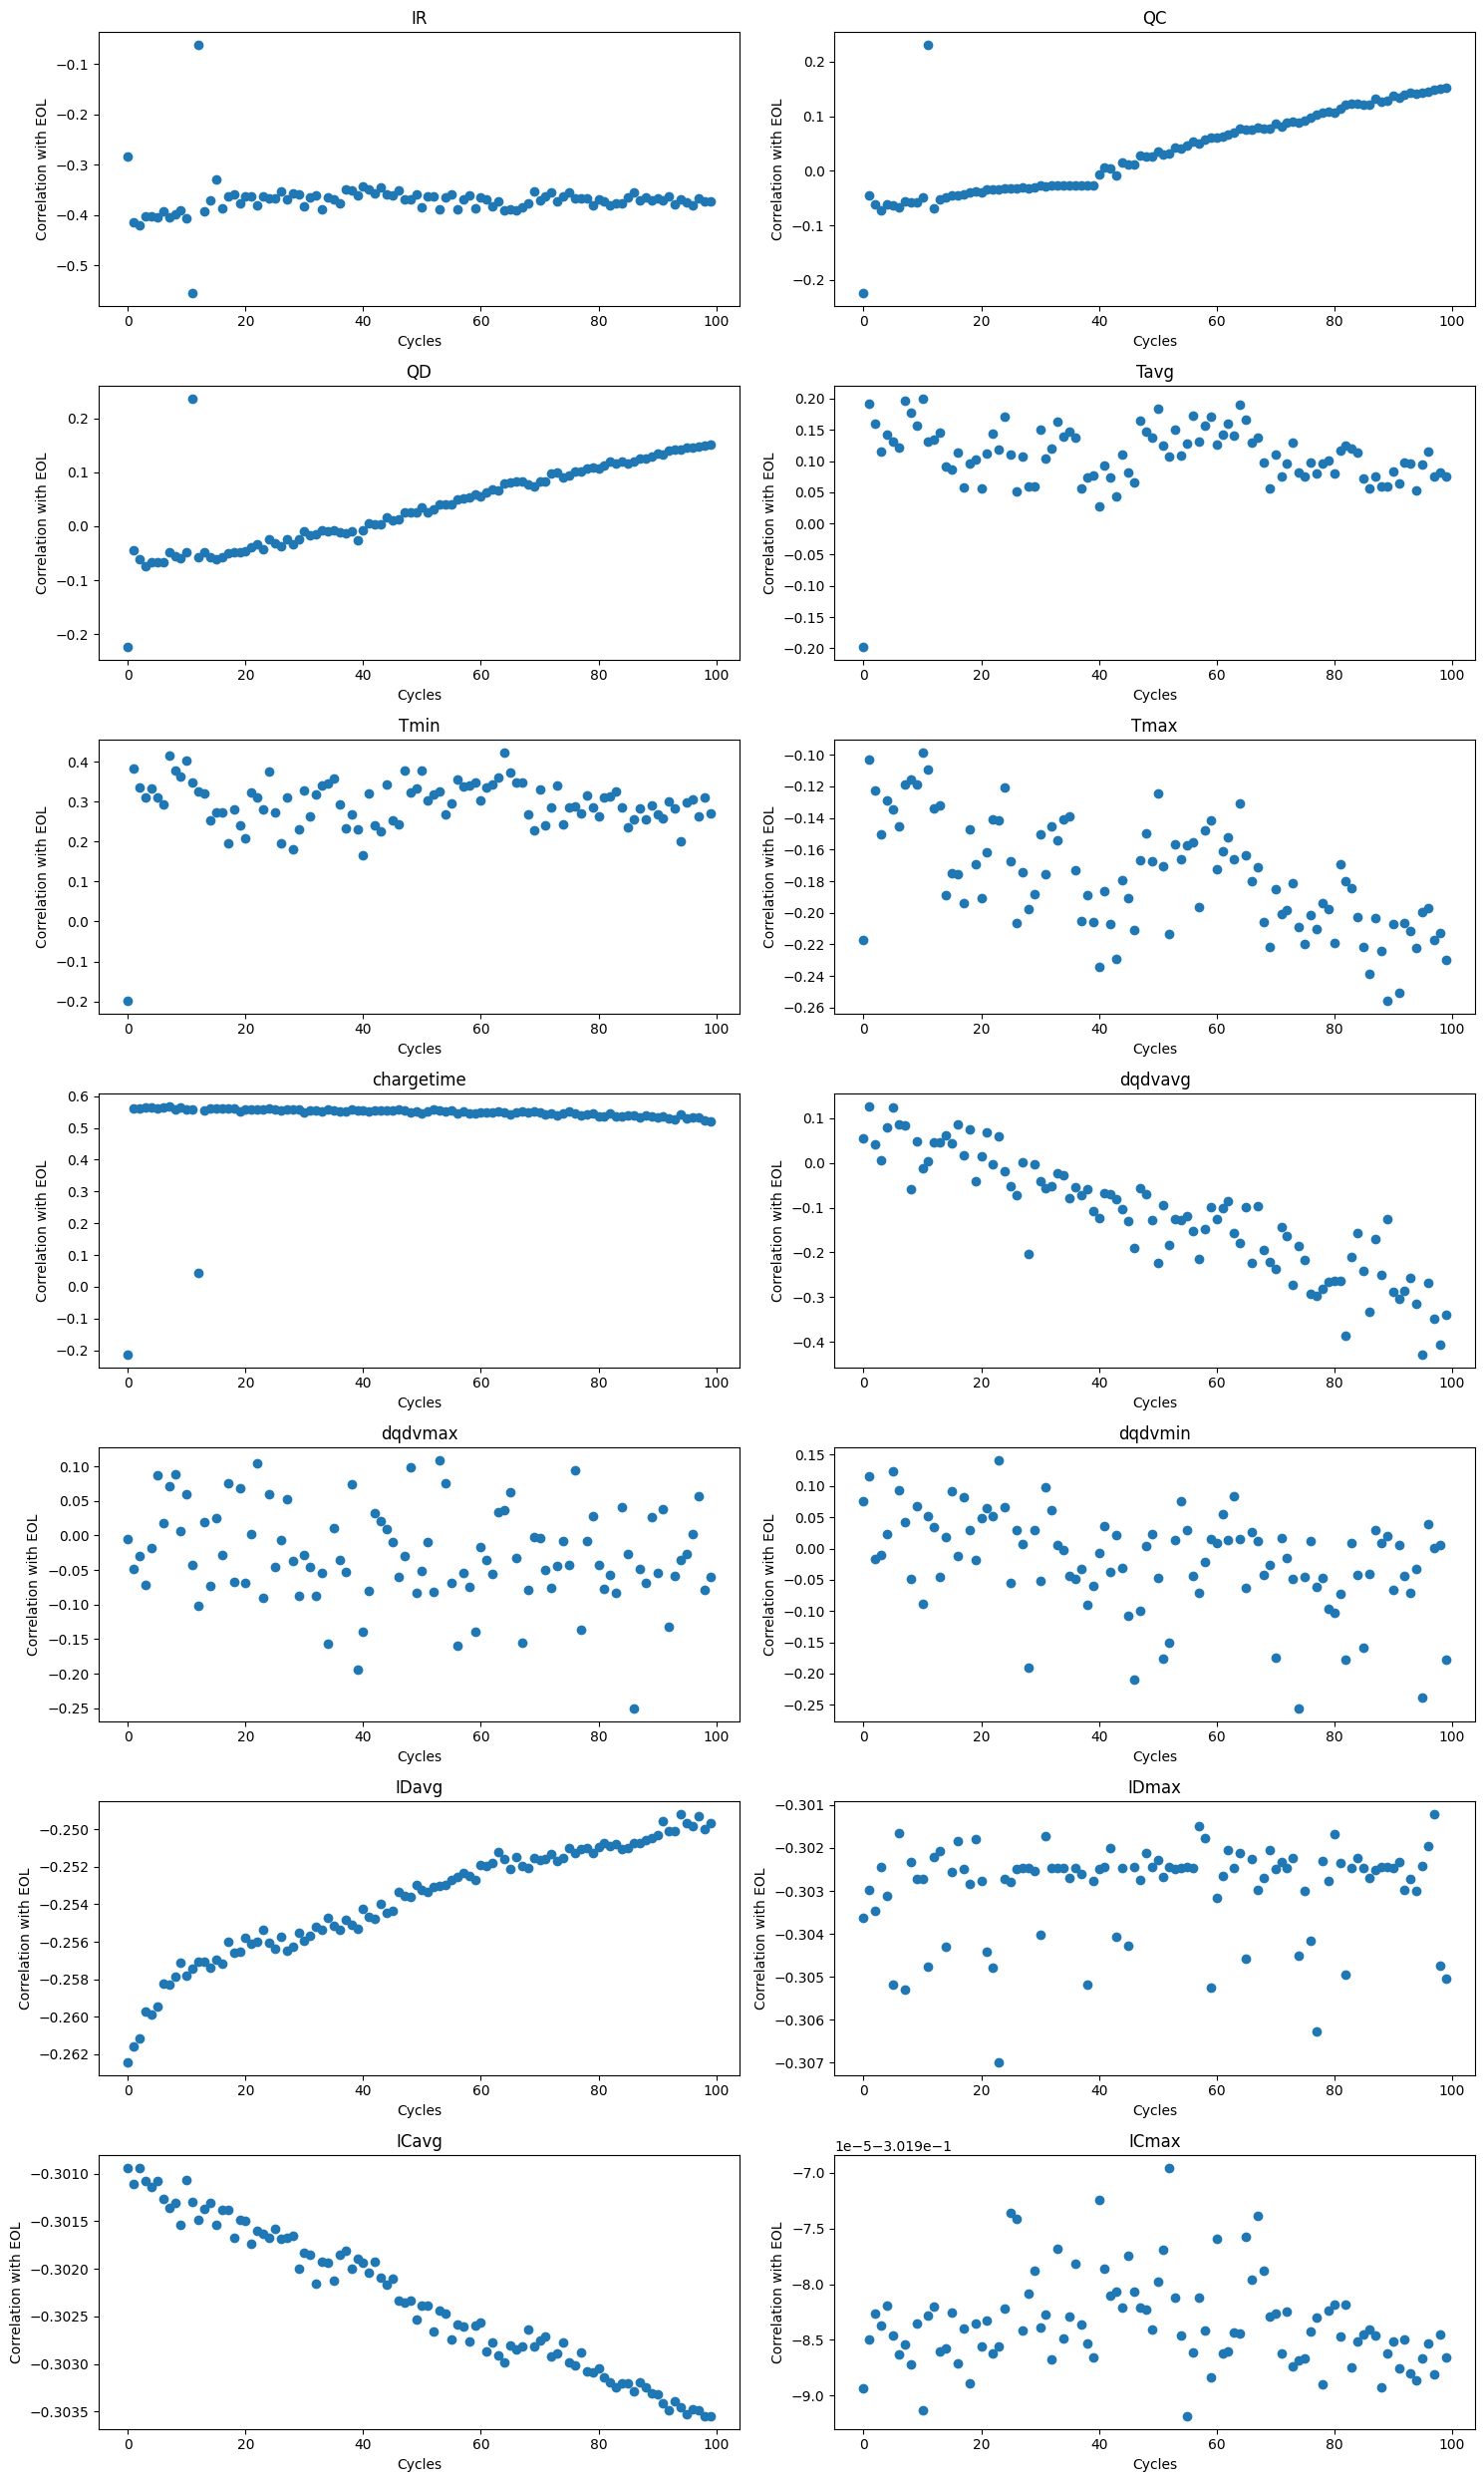

In [ ]:
# List of feature names
feature_names = ["IR", "QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime", "dqdvavg", "dqdvmax", "dqdvmin", "IDavg", "IDmax", "ICavg", "ICmax"]

# Create 2D scatter plots for each feature
fig, axs = plt.subplots(7, 2, figsize=(15, 25))

for i in range(7):
    for j in range(2):
        # Calculate index from subplot grid dimensions
        index = i * 2 + j

        # Check if index is less than the number of features
        if index < new_cycle_sum.shape[1]:
            # Plot correlation for current feature
            axs[i, j].scatter(range(correlations.shape[1]), correlations[index])

            # Set labels
            axs[i, j].set_xlabel('Cycles')
            axs[i, j].set_ylabel('Correlation with EOL')
            axs[i, j].set_title(f'{feature_names[index]}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, Y_test, n_repeats=100, random_state=42)

perm_importance.importances_mean


array([0.19689419, 0.13608205, 0.09627606, 0.04949339, 0.04184458,
       0.04511065, 0.3862503 , 0.19762495, 0.23056245, 0.05682508,
       0.07527842, 0.17043932, 0.39835027, 0.29654058])

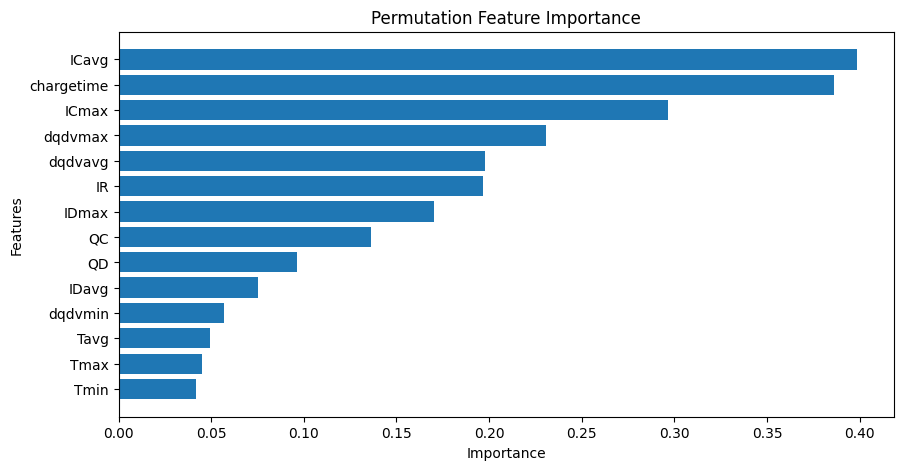

In [ ]:
# Sort features according to importance
sorted_idx = perm_importance.importances_mean.argsort()
feature_names_sorted = np.array(feature_names)[sorted_idx]
feature_importances_sorted = perm_importance.importances_mean[sorted_idx]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names_sorted, feature_importances_sorted)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()
